In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)



Populating the interactive namespace from numpy and matplotlib


In [907]:
import numpy as np
import cv2
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from camera import Camera
from linefilter import LineFilter
from linefinder import LineFinder
from lanerenderer import LaneRenderer

In [3]:
projectionPoints = [(620, 435), (658, 433), (1063, 694), (227, 705)]
camera = Camera((9,6), projectionPoints)


In [4]:
camimgs = glob.glob('./camera_cal/calibration*.jpg')
camera_images = []
for imgPath in camimgs:
    camera_images.append(mpimg.imread(imgPath))
camera_calibrations = camera.calibrate(camera_images)

In [5]:
undistorted_imgs = []
distorted_imgs = []
for img, corners in camera_calibrations:
    distorted_imgs.append(img)
    undistorted_imgs.append(camera.undistort(camera.drawCorners(img, corners)))

/Volumes/DATA/work/udacity/sdcnd/CarND-Advanced-Lane-Lines/camera.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return cv2.drawChessboardCorners(img, self.pattern, corners, corners != None)


In [6]:
def showImages(images, imgs_row, imgs_col, cmap=None):
    fig, axes = plt.subplots(imgs_row, imgs_col, figsize=(35, 35),
                             subplot_kw={'xticks': [], 'yticks': []})

    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    if imgs_row == 1 and imgs_col == 1:
        axes.imshow(images[0], cmap=cmap)
    else: 
        for ax, image in zip(axes.flat, images):
            ax.imshow(image, cmap=cmap)

    plt.show()
    plt.close()

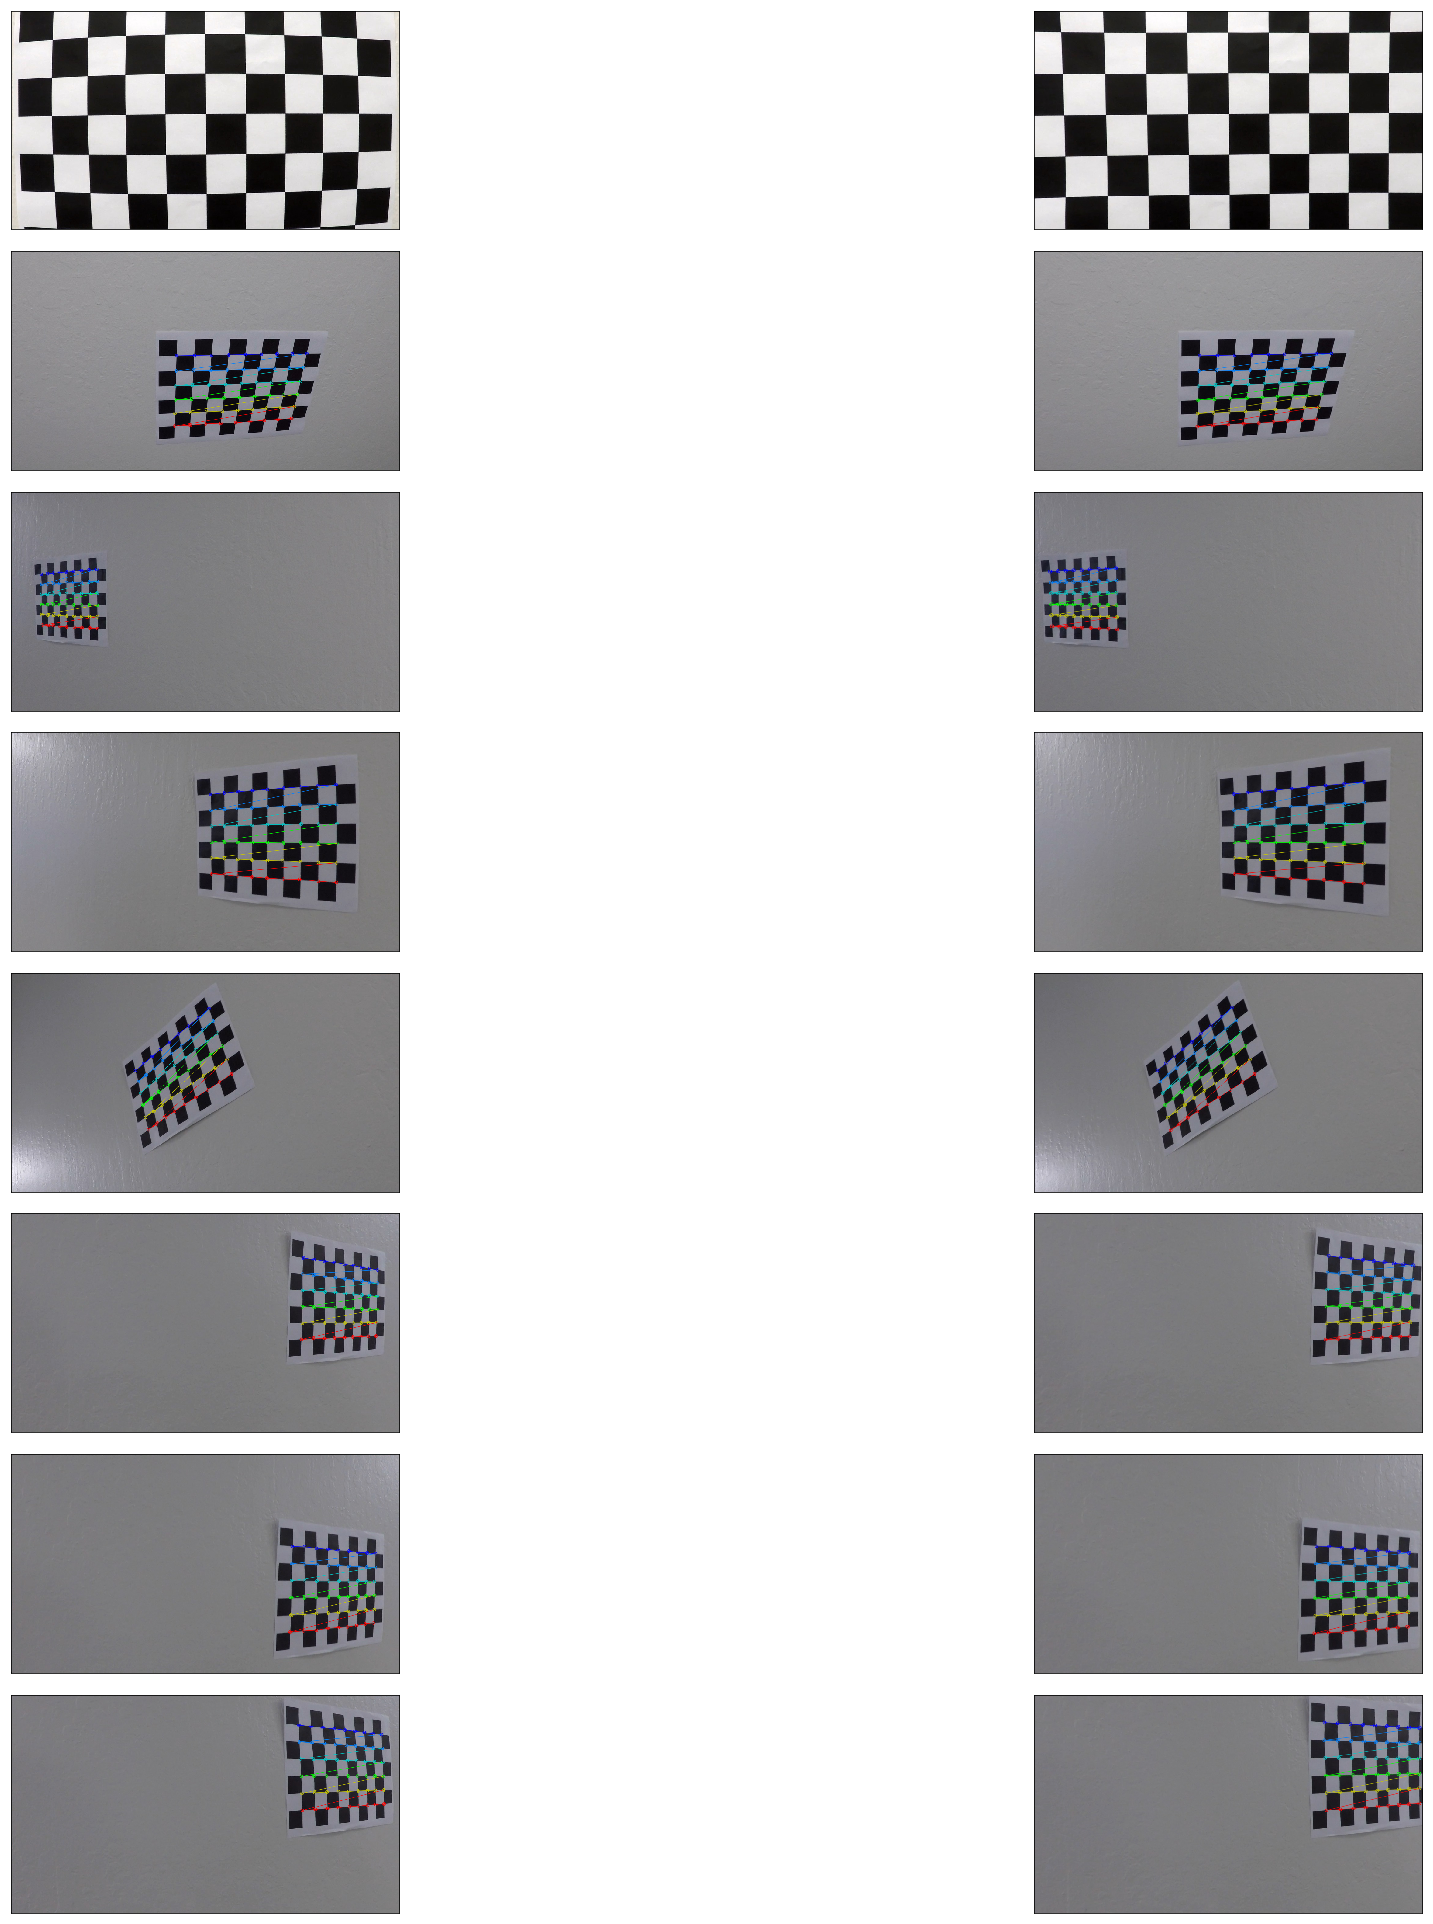

In [7]:
arrImgs = np.array([distorted_imgs, undistorted_imgs])
showImages(arrImgs.T.flatten(), 8, 2)

In [8]:
lf=LineFilter()

In [1032]:
testimgPaths = glob.glob('./test_images/test*.jpg')

un_test_images = []
hsl_test_images = []
hsv_test_images = []
gray_test_images = []
overhead_images = []
for imgPath in testimgPaths:
    img = camera.undistort(mpimg.imread(imgPath))
    mpimg.imsave('./undistort_images/' + os.path.basename(imgPath), img)
    un_test_images.append(img)    
for img in un_test_images:
    hsl_test_images.append(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))
    hsv_test_images.append(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
for img in un_test_images:
    gray_test_images.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

/Volumes/DATA/work/udacity/sdcnd/CarND-Advanced-Lane-Lines/linefilter.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.mask != None:
/Volumes/DATA/work/udacity/sdcnd/CarND-Advanced-Lane-Lines/linefilter.py:111: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if color == None:


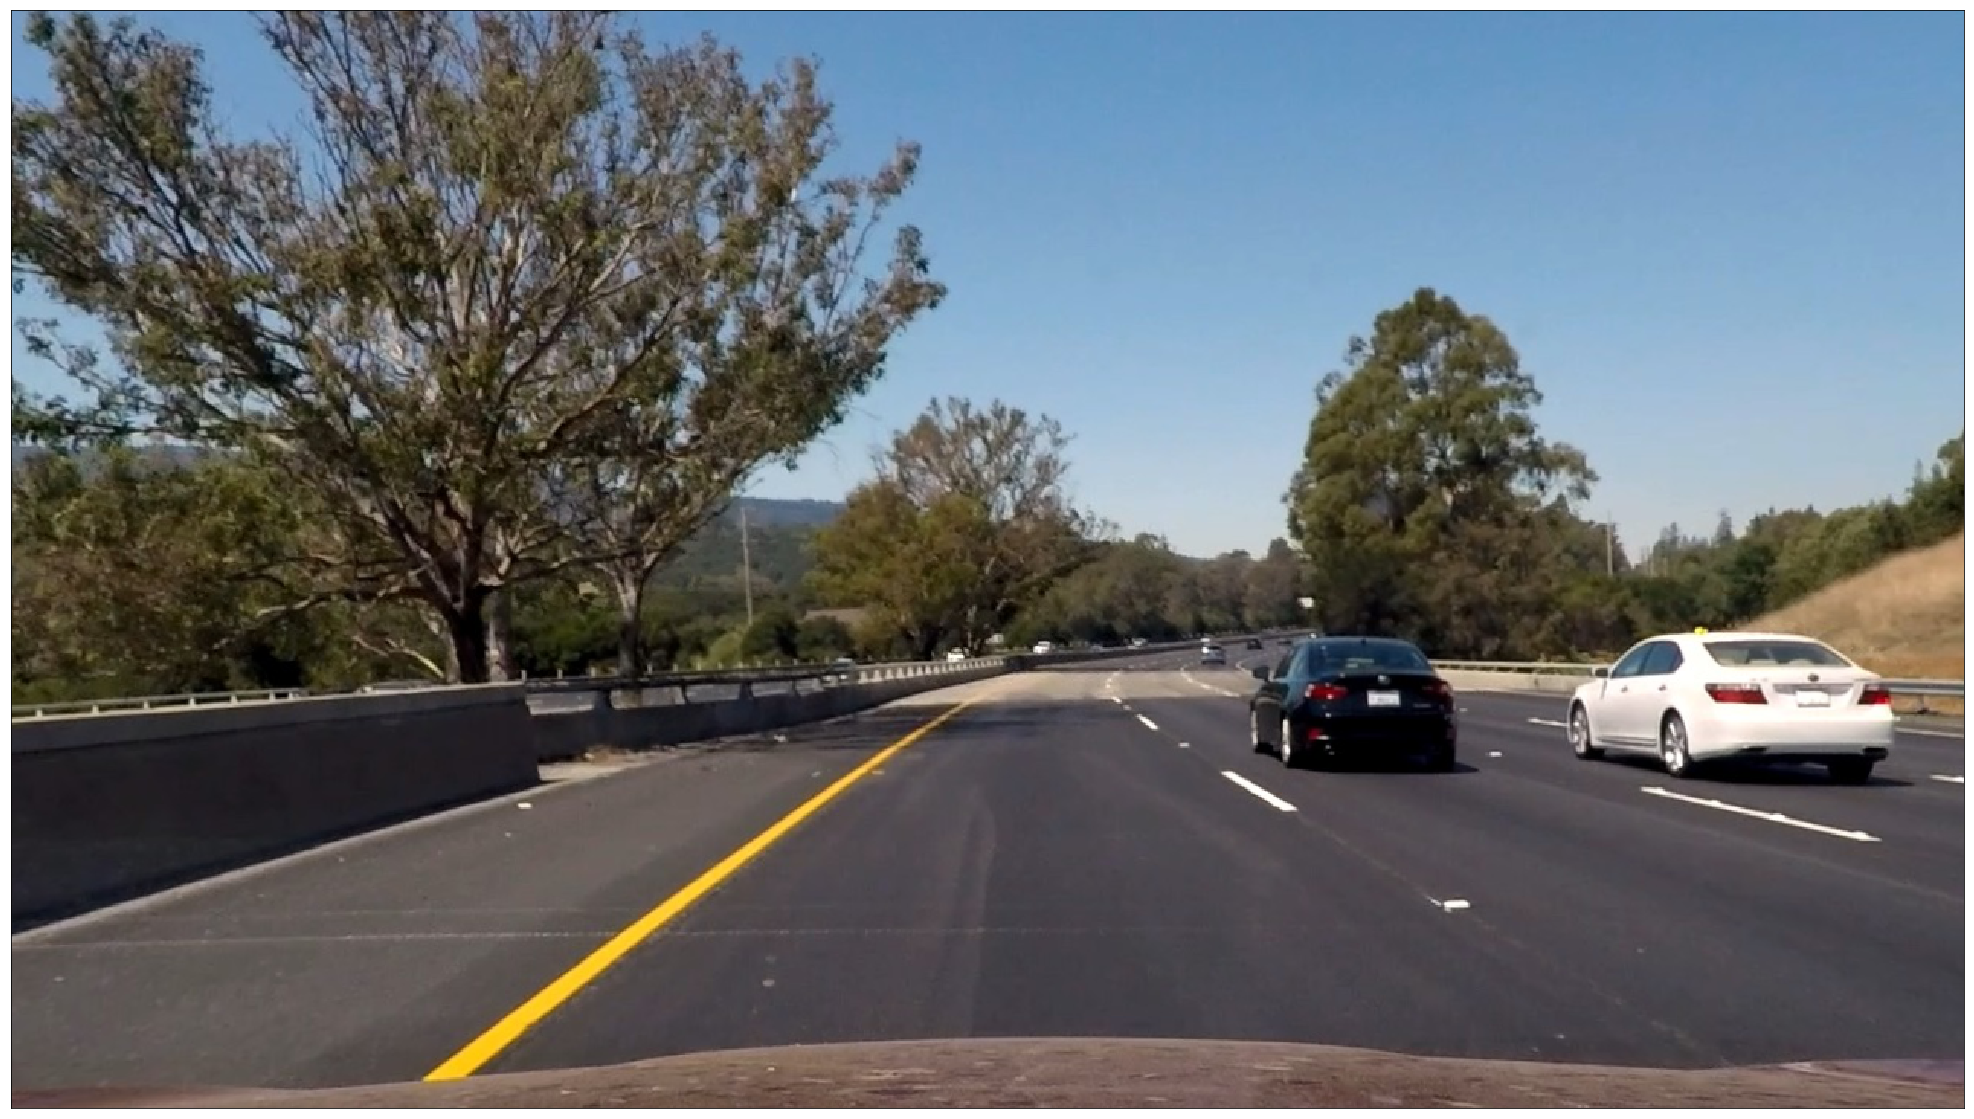

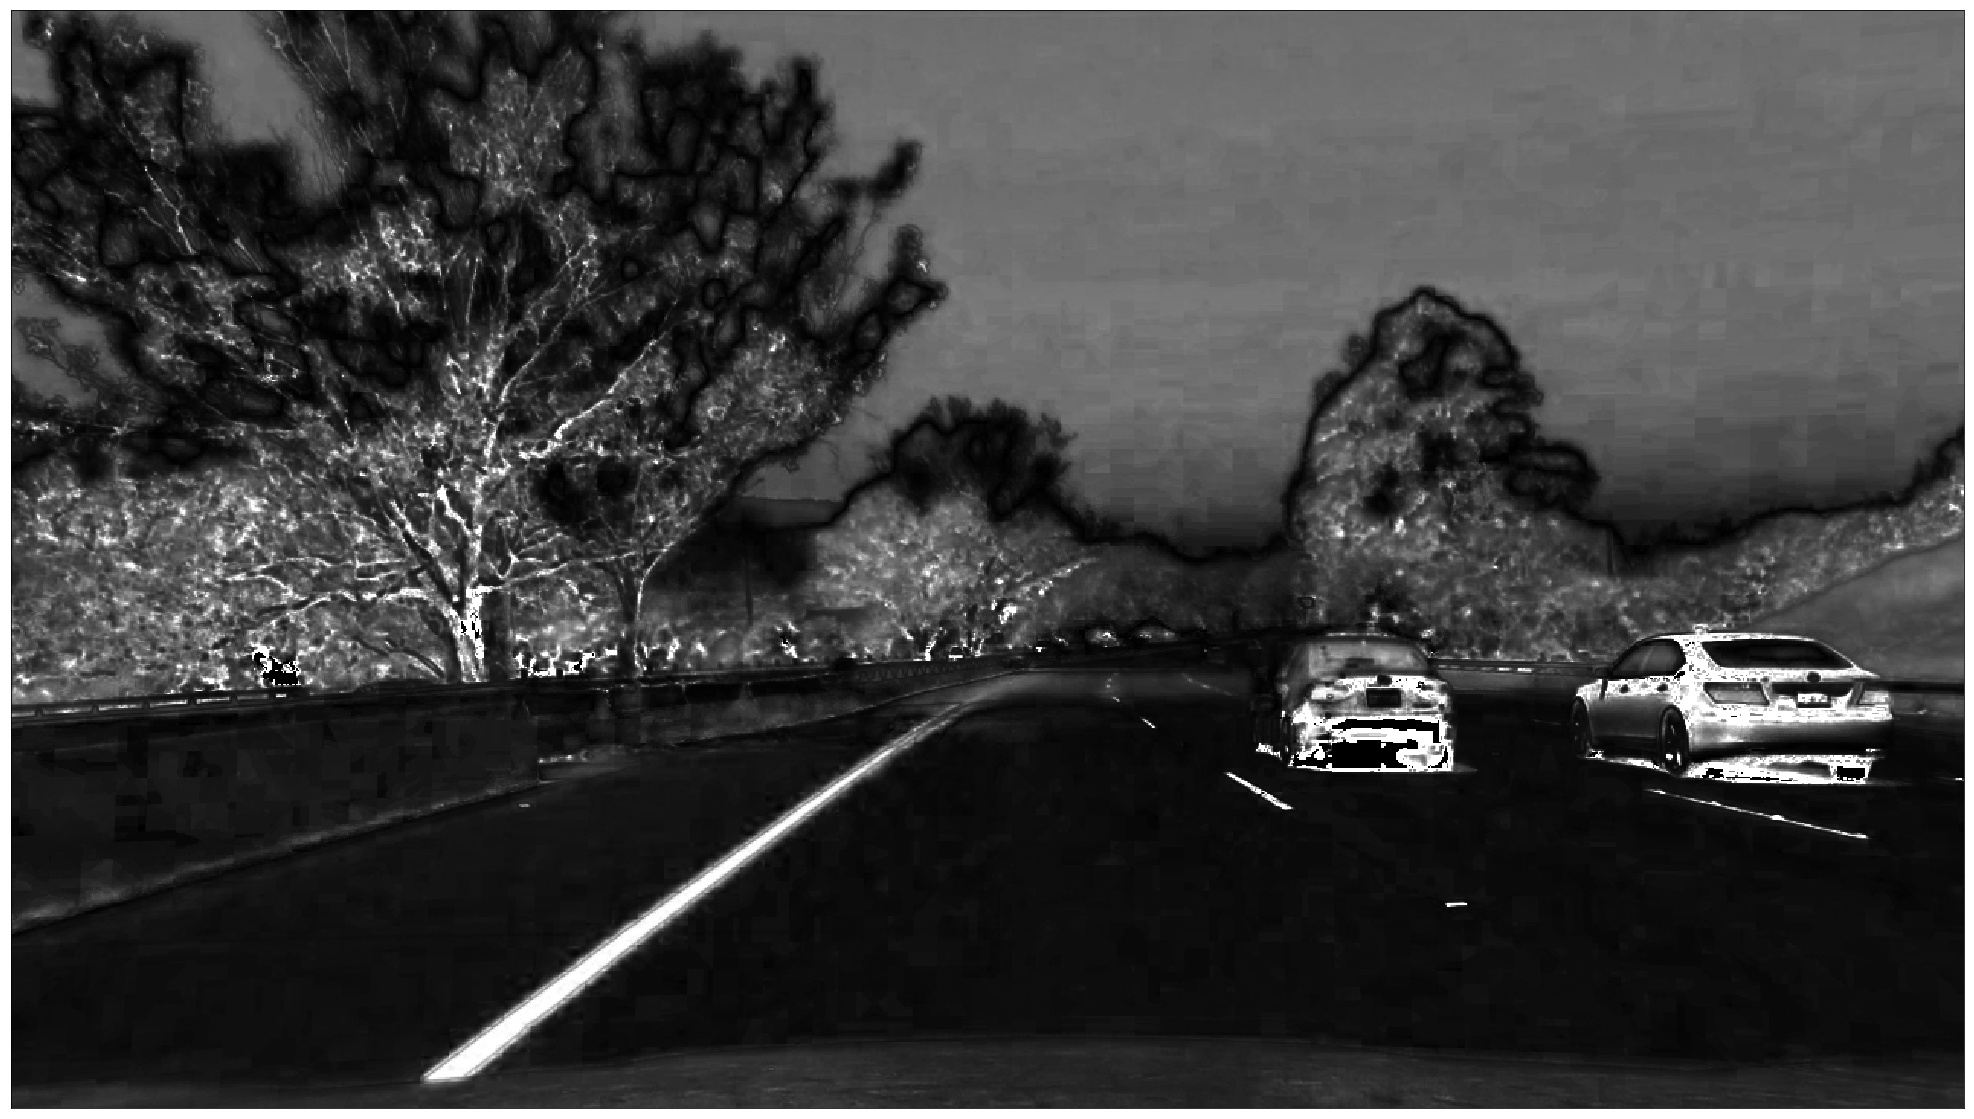

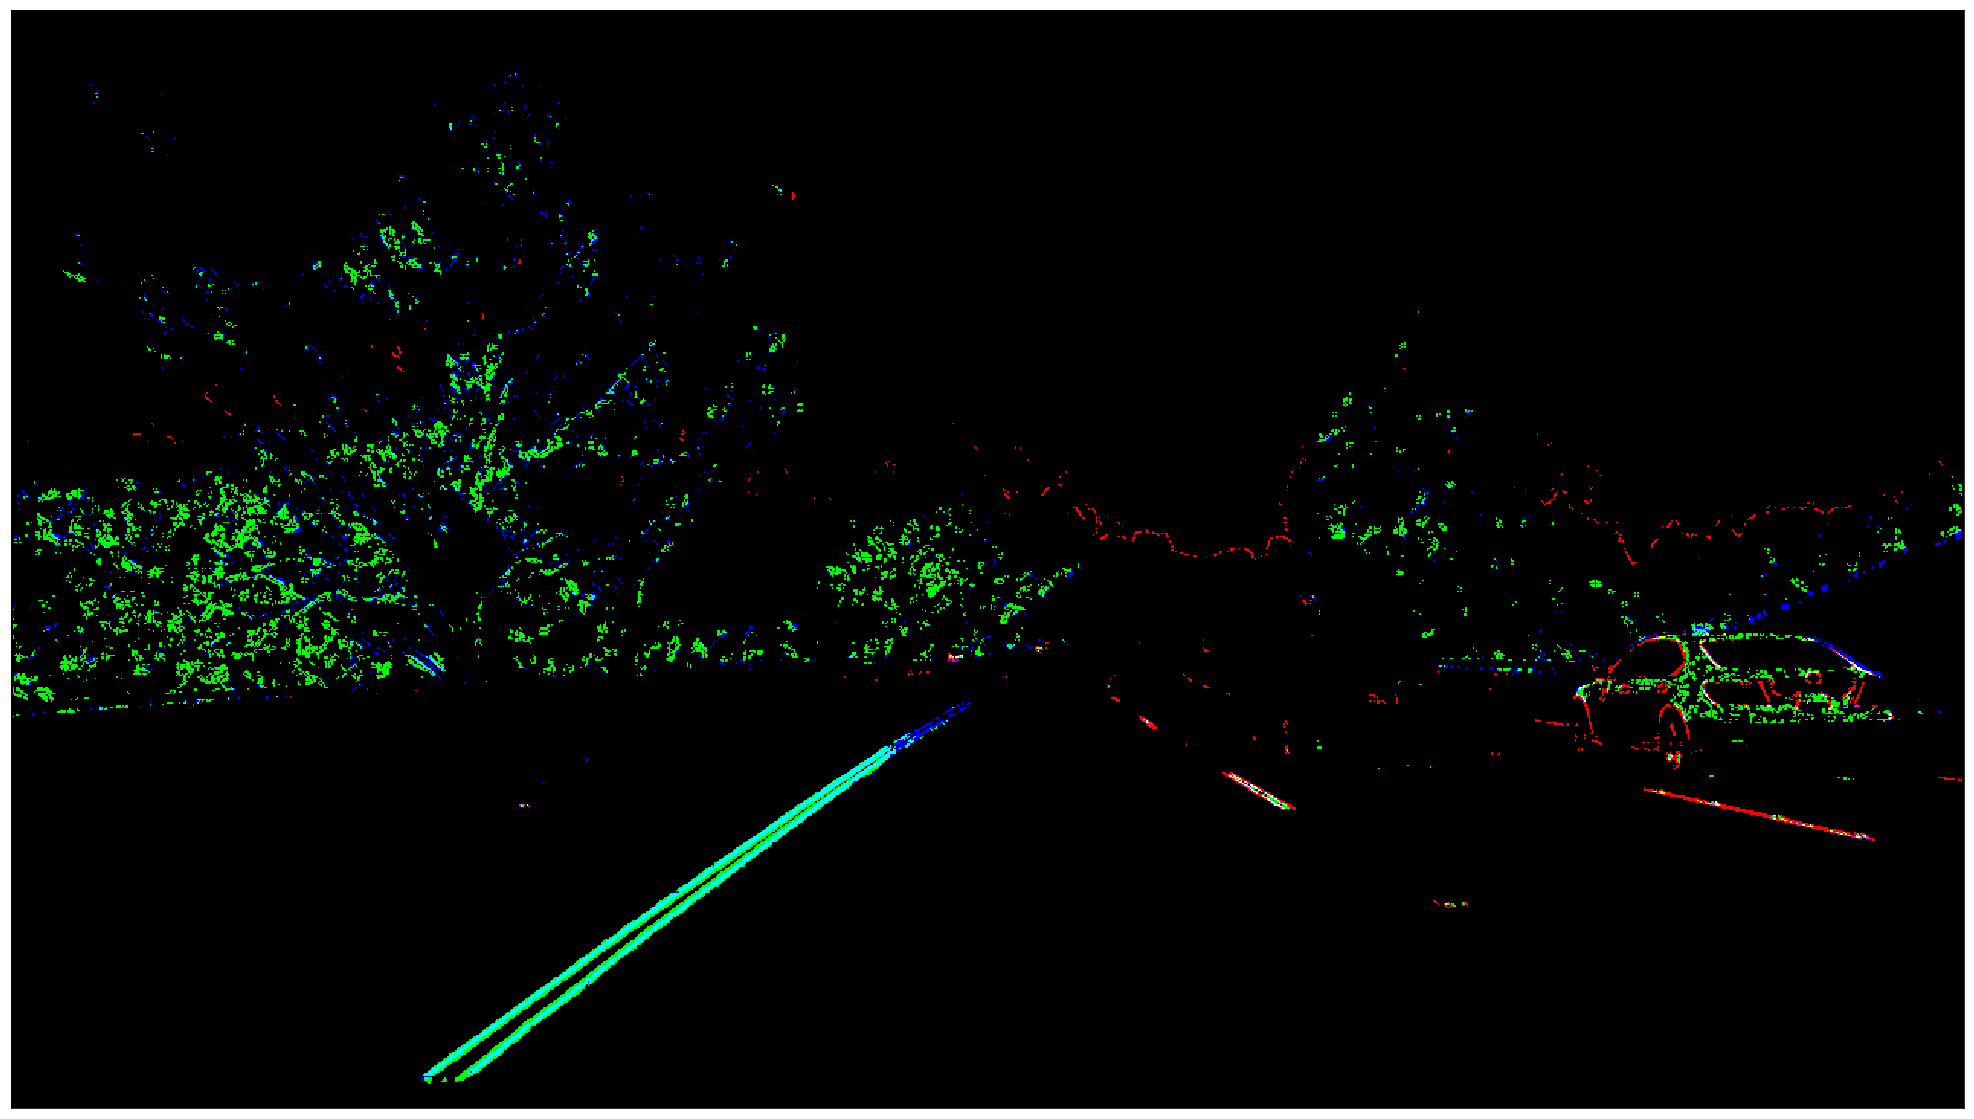

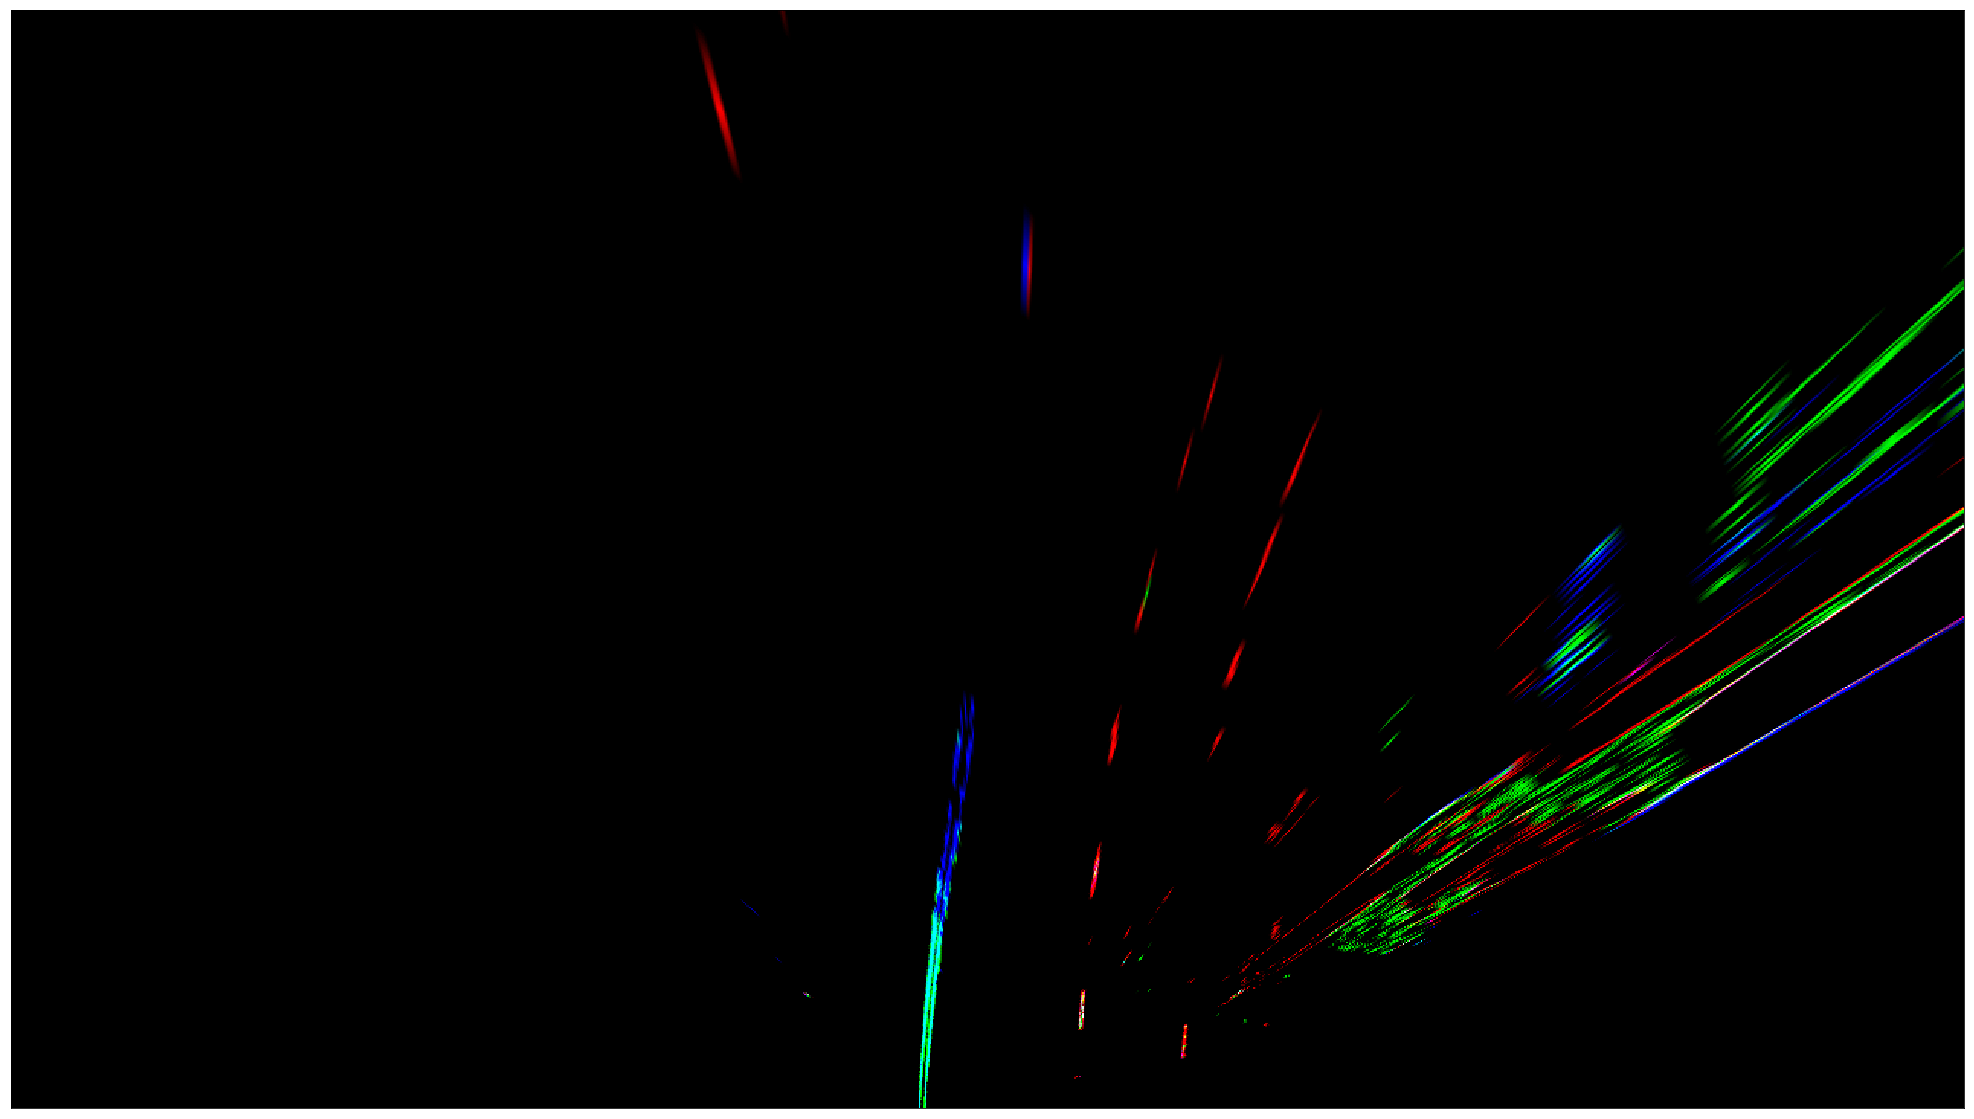

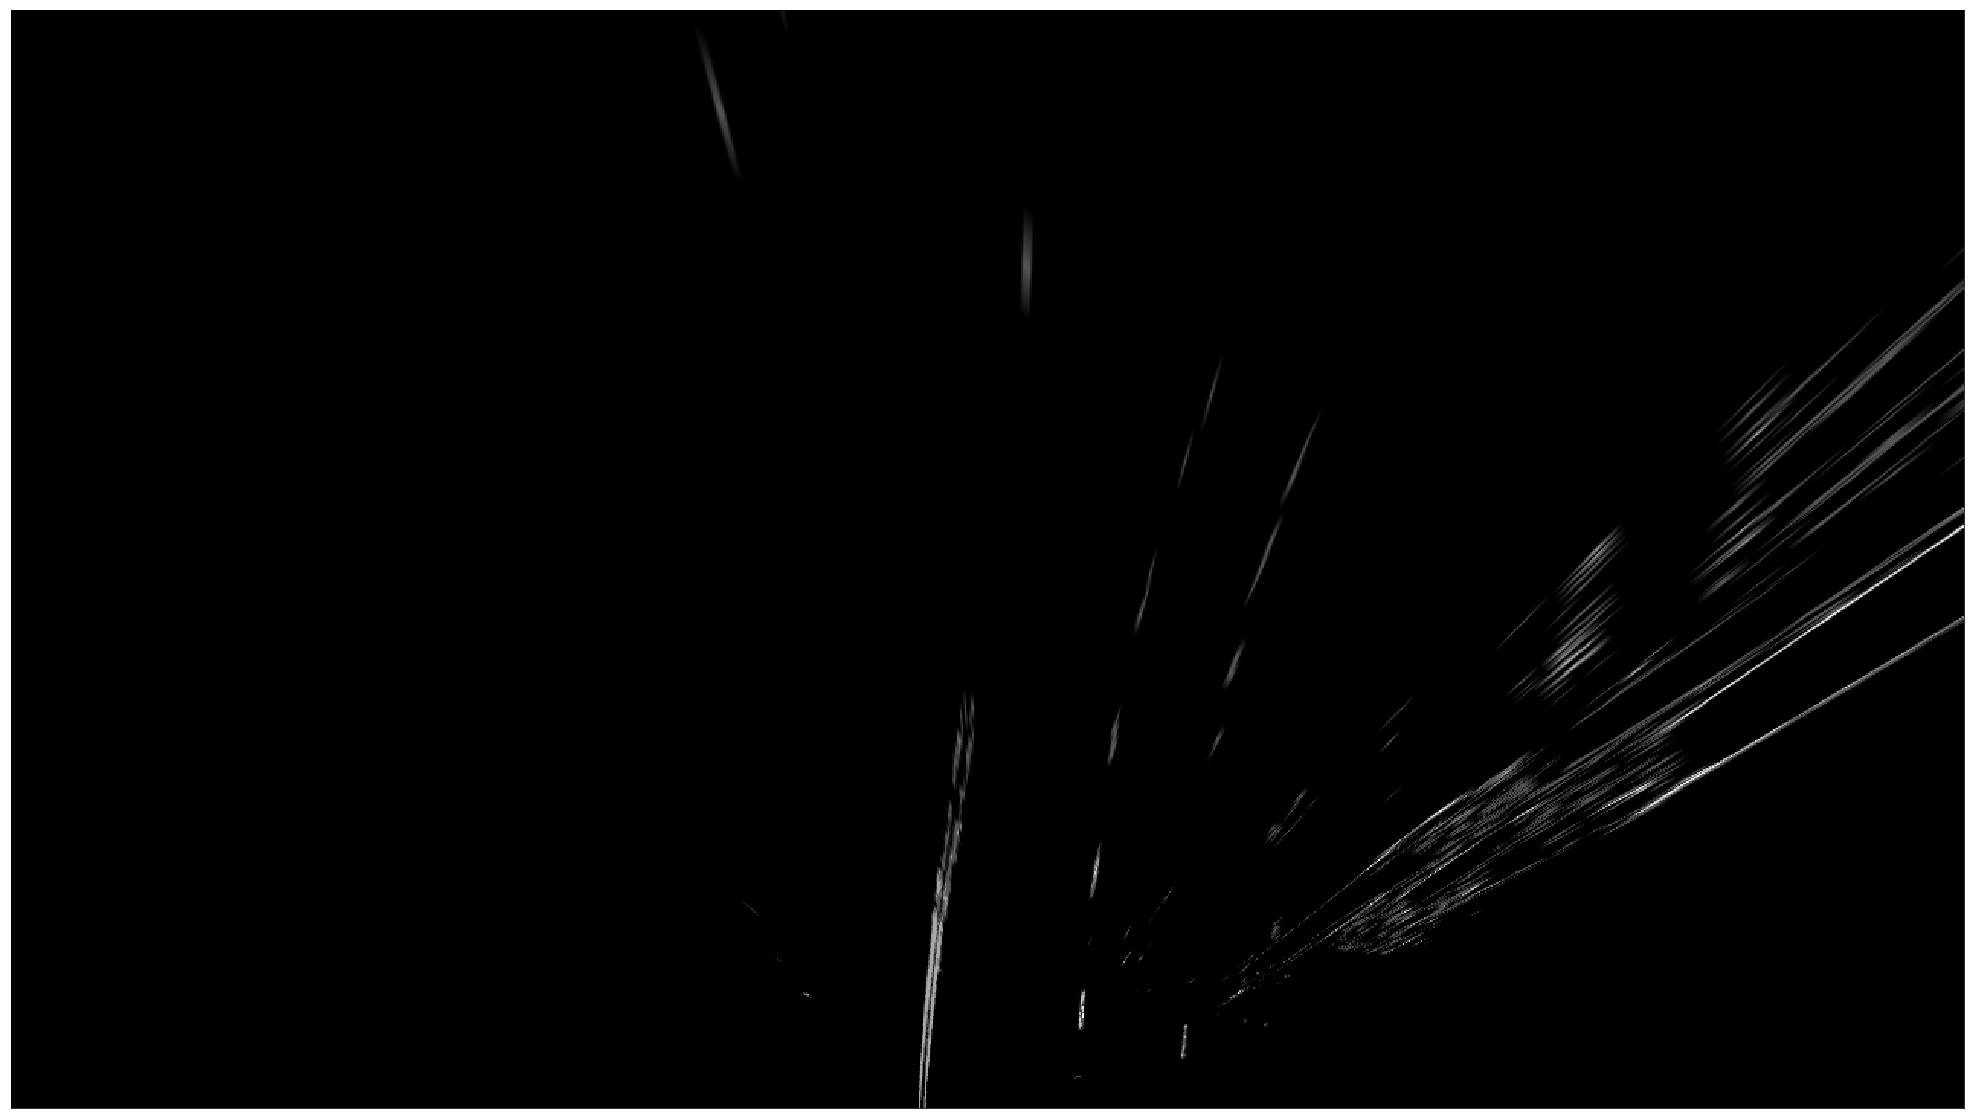

In [1123]:
kernelSize=7
magnitudeThreshold=(10.0, 20.1)
angleThreshold=(0.7,1.5)
whiteLines=()
imgindex = 5
H = 0
S = 2
L = 1
laneWidth=100


img1 = [lf.source(hsl_test_images[imgindex]).
    colorThreshold(0, (15, 30)). 
    colorThreshold(S, (110, 255)).   
    #sobelMagThreshold(S, (1, 255), 3).
    sobelXThreshold(S, (4, 255), 7).
    sobelYThreshold(S, (4, 255), 7).
    #sobelAngleThreshold(S, (0.5,1.75),3).
    #sobelXThreshold(L, (3, 255), 7).
    #sobelYThreshold(1, (2, 255), 7). 
    #sobelYThreshold(2, (5, 20), 9).
    #sobelMagThreshold(2, (0.75, 255), 9). 
    #sobelThreshold(1, (.3, 1.75), kernel=9). 
    #sobelThreshold(1, (0.5, 1.2), (0.5, 255)). 
    markLines()
]
    
img2 = [lf.source(hsl_test_images[imgindex]).
    colorThreshold(0, (15, 36)). 
    colorThreshold(S, (60, 255)).   
    #sobelMagThreshold(S, (4, 255), 5).
    sobelXThreshold(L, (7, 255), 5).
    sobelYThreshold(L, (7, 255), 5).
    #sobelAngleThreshold(S, (0.5,1.75),3).
    #sobelXThreshold(L, (3, 255), 7).
    #sobelYThreshold(1, (2, 255), 7). 
    #sobelYThreshold(2, (5, 20), 9).
    #sobelMagThreshold(2, (0.75, 255), 9). 
    markLines()
       ]

img3 = [lf.source(un_test_images[imgindex]).
    colorThreshold(0, (180, 255)). 
    colorThreshold(2, (180, 255)). 
    #colorThreshold(S, (80, 255)).   
    #sobelXThreshold(2, (6, 255), 5).
    #sobelYThreshold(2, (6, 255), 5).
    sobelMagThreshold(0, (5, 255), 3).
    sobelMagThreshold(2, (5, 255), 3).
    #sobelYThreshold(L, (5, 255), 3).
    #sobelAngleThreshold(S, (0.5,1.75),3).
    #sobelXThreshold(L, (3, 255), 7).
    #sobelYThreshold(1, (2, 255), 7). 
    #sobelYThreshold(2, (5, 20), 9).
    #sobelMagThreshold(2, (0.75, 255), 9). 
    markLines()
       ]

marked = [
    lf.combine([img1[0], img2[0], img3[0]], useColors=np.array([[0, 1, 0], [0, 0, 1], [1,0,0]]))
]

array = [un_test_images[imgindex]]
showImages(array, 1, 1)

array = [hsl_test_images[imgindex][:,:,S]]
showImages(array, 1, 1, cmap='gray')

array = [marked[0]]
showImages(array, 1, 1)

array = [camera.unproject(marked[0], laneWidth, (1280, 720))]
showImages(array, 1, 1)

overhead_image = np.sum(array[0], axis=2)

array = [overhead_image]
showImages(array, 1, 1, cmap='gray')


In [1124]:
linefinder = LineFinder(100, 5, 30, 30, 10, 8)

In [1125]:
left_lane_img, right_lane_img = linefinder.maskLines(overhead_image, drawBoundaries=False)

centroids found:  [(600, 701), (600, 700), (602, 702), (605, 706), (607, 709), (616, 711), (621, 711), (619, 721), (628, 723), (626, 723), (626, 739), (626, 745), (626, 749), (626, 766), (626, 771), (626, 786), (626, 791), (665, 791), (665, 791), (666, 791), (666, 791), (666, 791), (666, 791), (666, 791)]


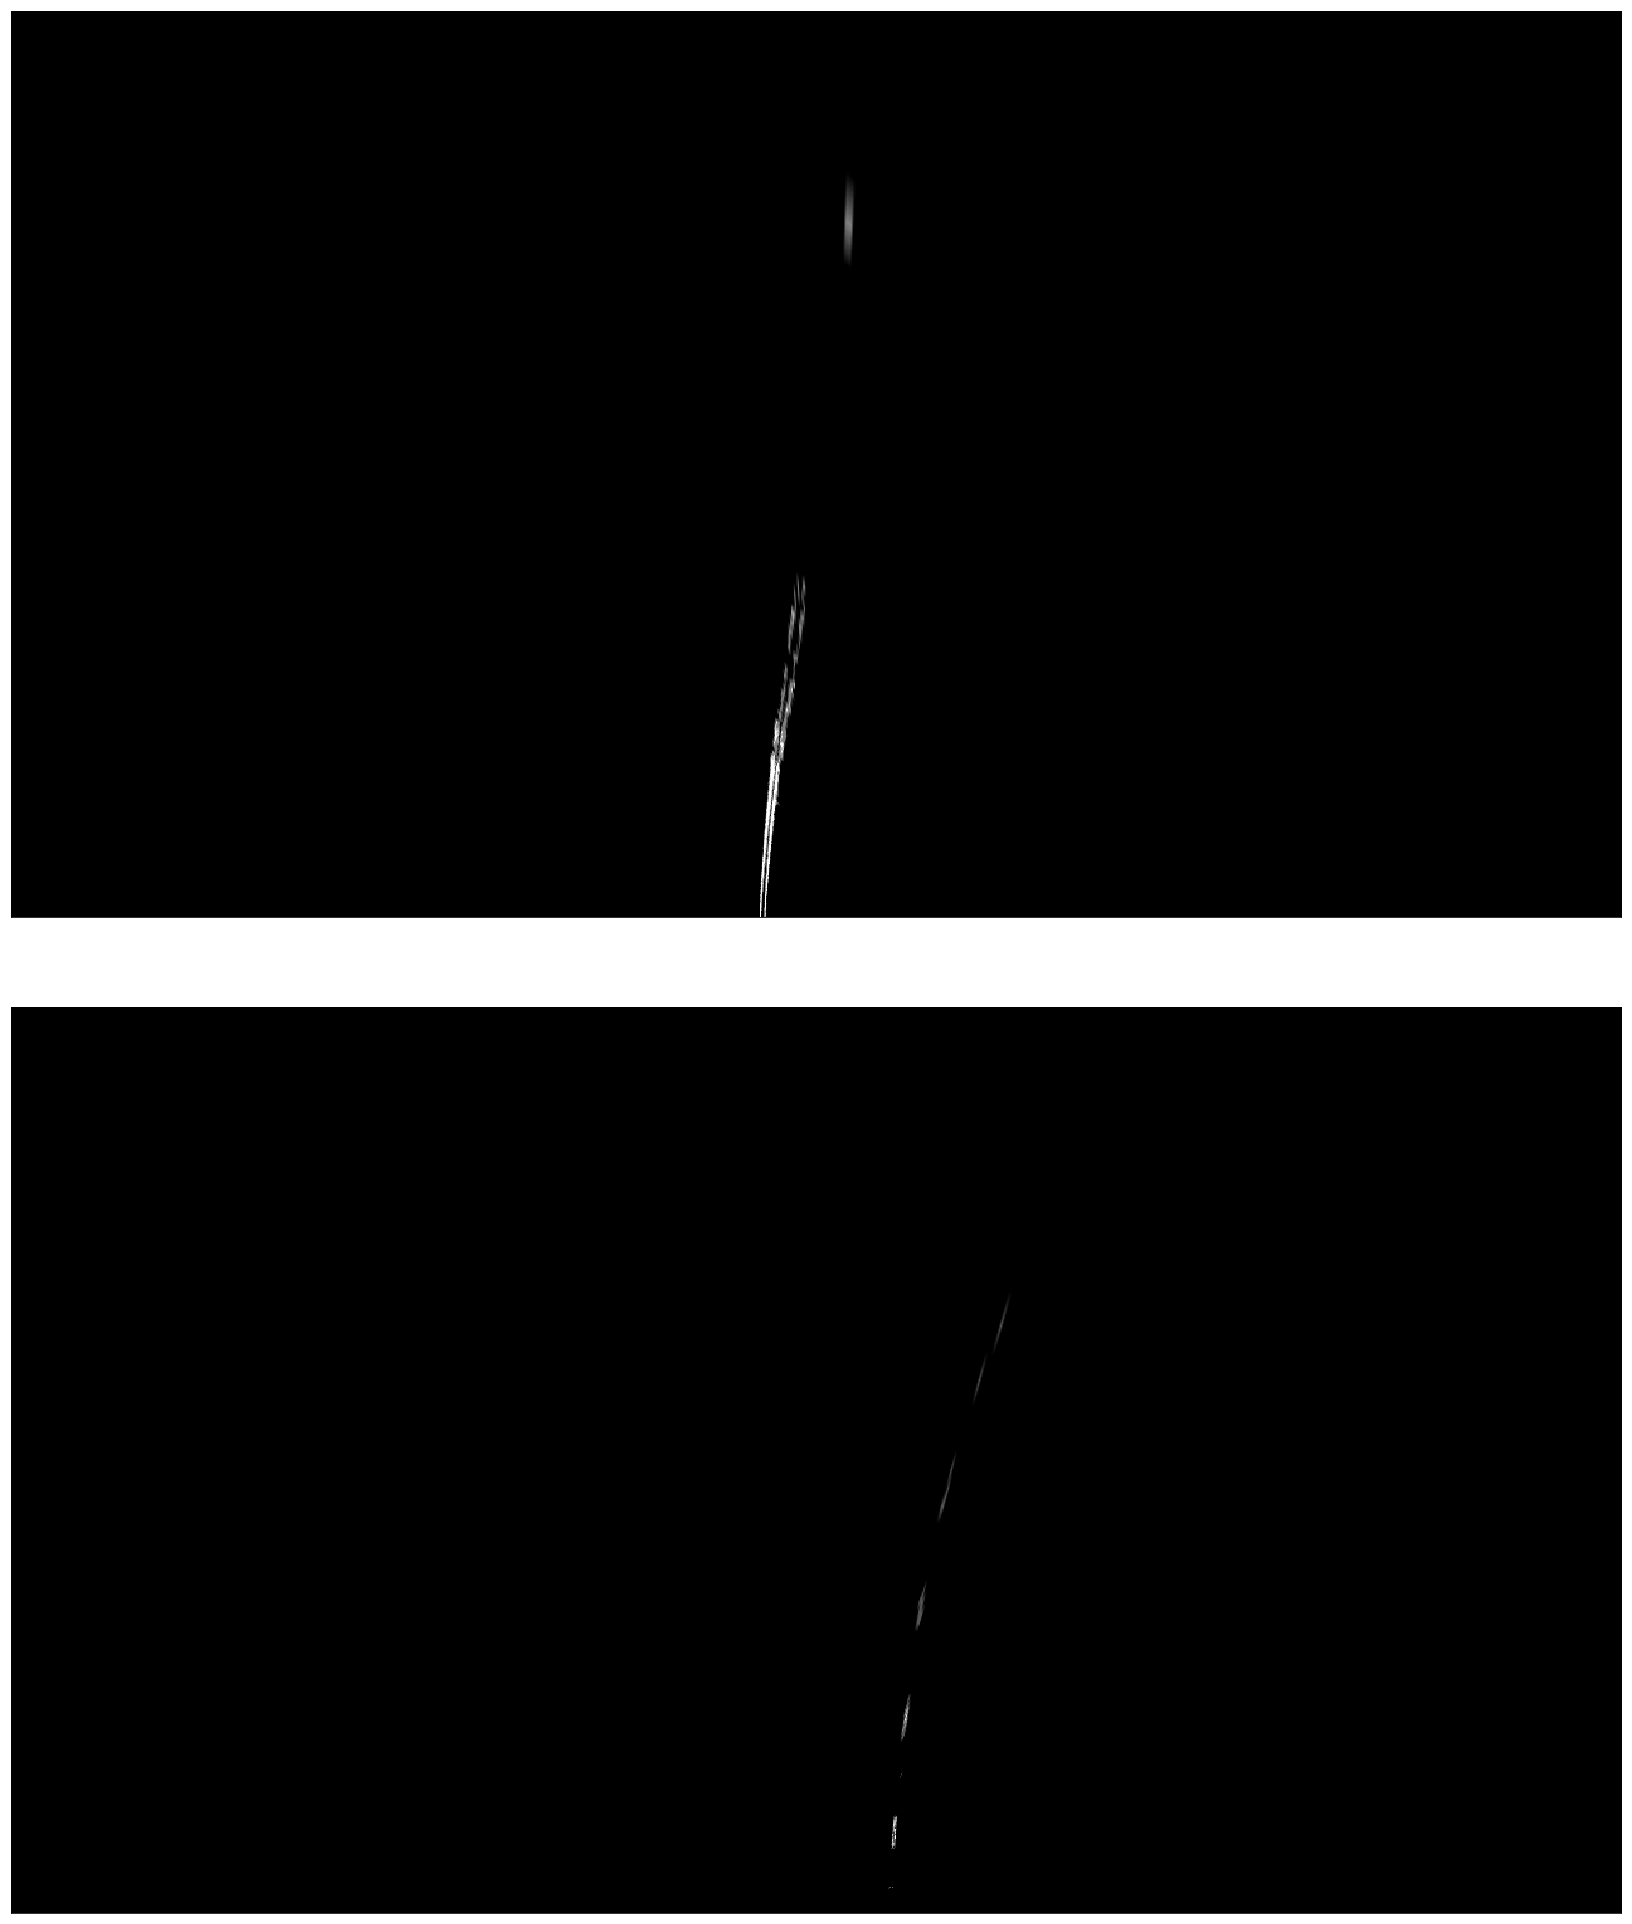

In [1126]:
showImages([left_lane_img, right_lane_img], 2, 1, cmap='gray')

In [1127]:
lanerender=LaneRenderer(120)

In [1128]:
l_fit, r_fit = lanerender.findLaneFit(left_lane_img, right_lane_img)

(array([127, 128, 128, ..., 719, 719, 719]), array([663, 663, 664, ..., 595, 598, 599]), array([ 0.00878906,  0.00878906,  0.0234375 , ...,  2.        ,
        1.        ,  1.265625  ], dtype=float32)) (array([225, 226, 226, 226, 227, 227, 227, 227, 228, 228, 228, 229, 229,
       229, 230, 230, 230, 230, 231, 231, 231, 231, 232, 232, 232, 233,
       233, 233, 233, 234, 234, 234, 234, 235, 235, 235, 236, 236, 236,
       237, 237, 237, 237, 238, 238, 238, 238, 239, 239, 239, 240, 240,
       240, 241, 241, 241, 241, 242, 242, 242, 243, 243, 243, 244, 244,
       244, 244, 245, 245, 245, 245, 246, 246, 246, 247, 247, 247, 248,
       248, 248, 248, 249, 249, 249, 250, 250, 250, 251, 251, 251, 251,
       252, 252, 252, 253, 253, 253, 254, 254, 254, 255, 255, 255, 255,
       256, 256, 256, 257, 257, 257, 258, 258, 258, 258, 259, 259, 259,
       260, 260, 260, 261, 261, 261, 262, 262, 262, 262, 263, 263, 263,
       264, 264, 264, 265, 265, 265, 265, 266, 266, 266, 267, 267, 267,
    

In [1129]:
print(l_fit, r_fit)

[  5.08440561e-07  -6.72745275e-04   1.33734417e-01   6.59263840e+02] [  1.19578423e-06  -1.41669891e-03   3.14318401e-01   7.67460577e+02]


In [1130]:
l_points = lanerender.generateLinePoints(left_lane_img.shape, l_fit, 5)
r_points = lanerender.generateLinePoints(right_lane_img.shape, r_fit, 5)

In [1131]:
left_lane_line_img = lanerender.renderLinePoints(l_points, 
  (left_lane_img.shape[0], left_lane_img.shape[1], 3), cv2.merge((left_lane_img, left_lane_img, left_lane_img)),
  thickness=3
)
right_lane_line_img = lanerender.renderLinePoints(r_points, 
  (right_lane_img.shape[0], right_lane_img.shape[1], 3), cv2.merge((right_lane_img, right_lane_img, right_lane_img)),
  thickness=3
)

left_line_img = lanerender.renderLinePoints(l_points, 
  (left_lane_img.shape[0], left_lane_img.shape[1], 3),
  thickness=3, alpha=1.0, color=(0, 0, 255)
)
right_line_img = lanerender.renderLinePoints(r_points, 
  (right_lane_img.shape[0], right_lane_img.shape[1], 3),
  thickness=3, alpha=1.0, color=(255, 0, 0)
)

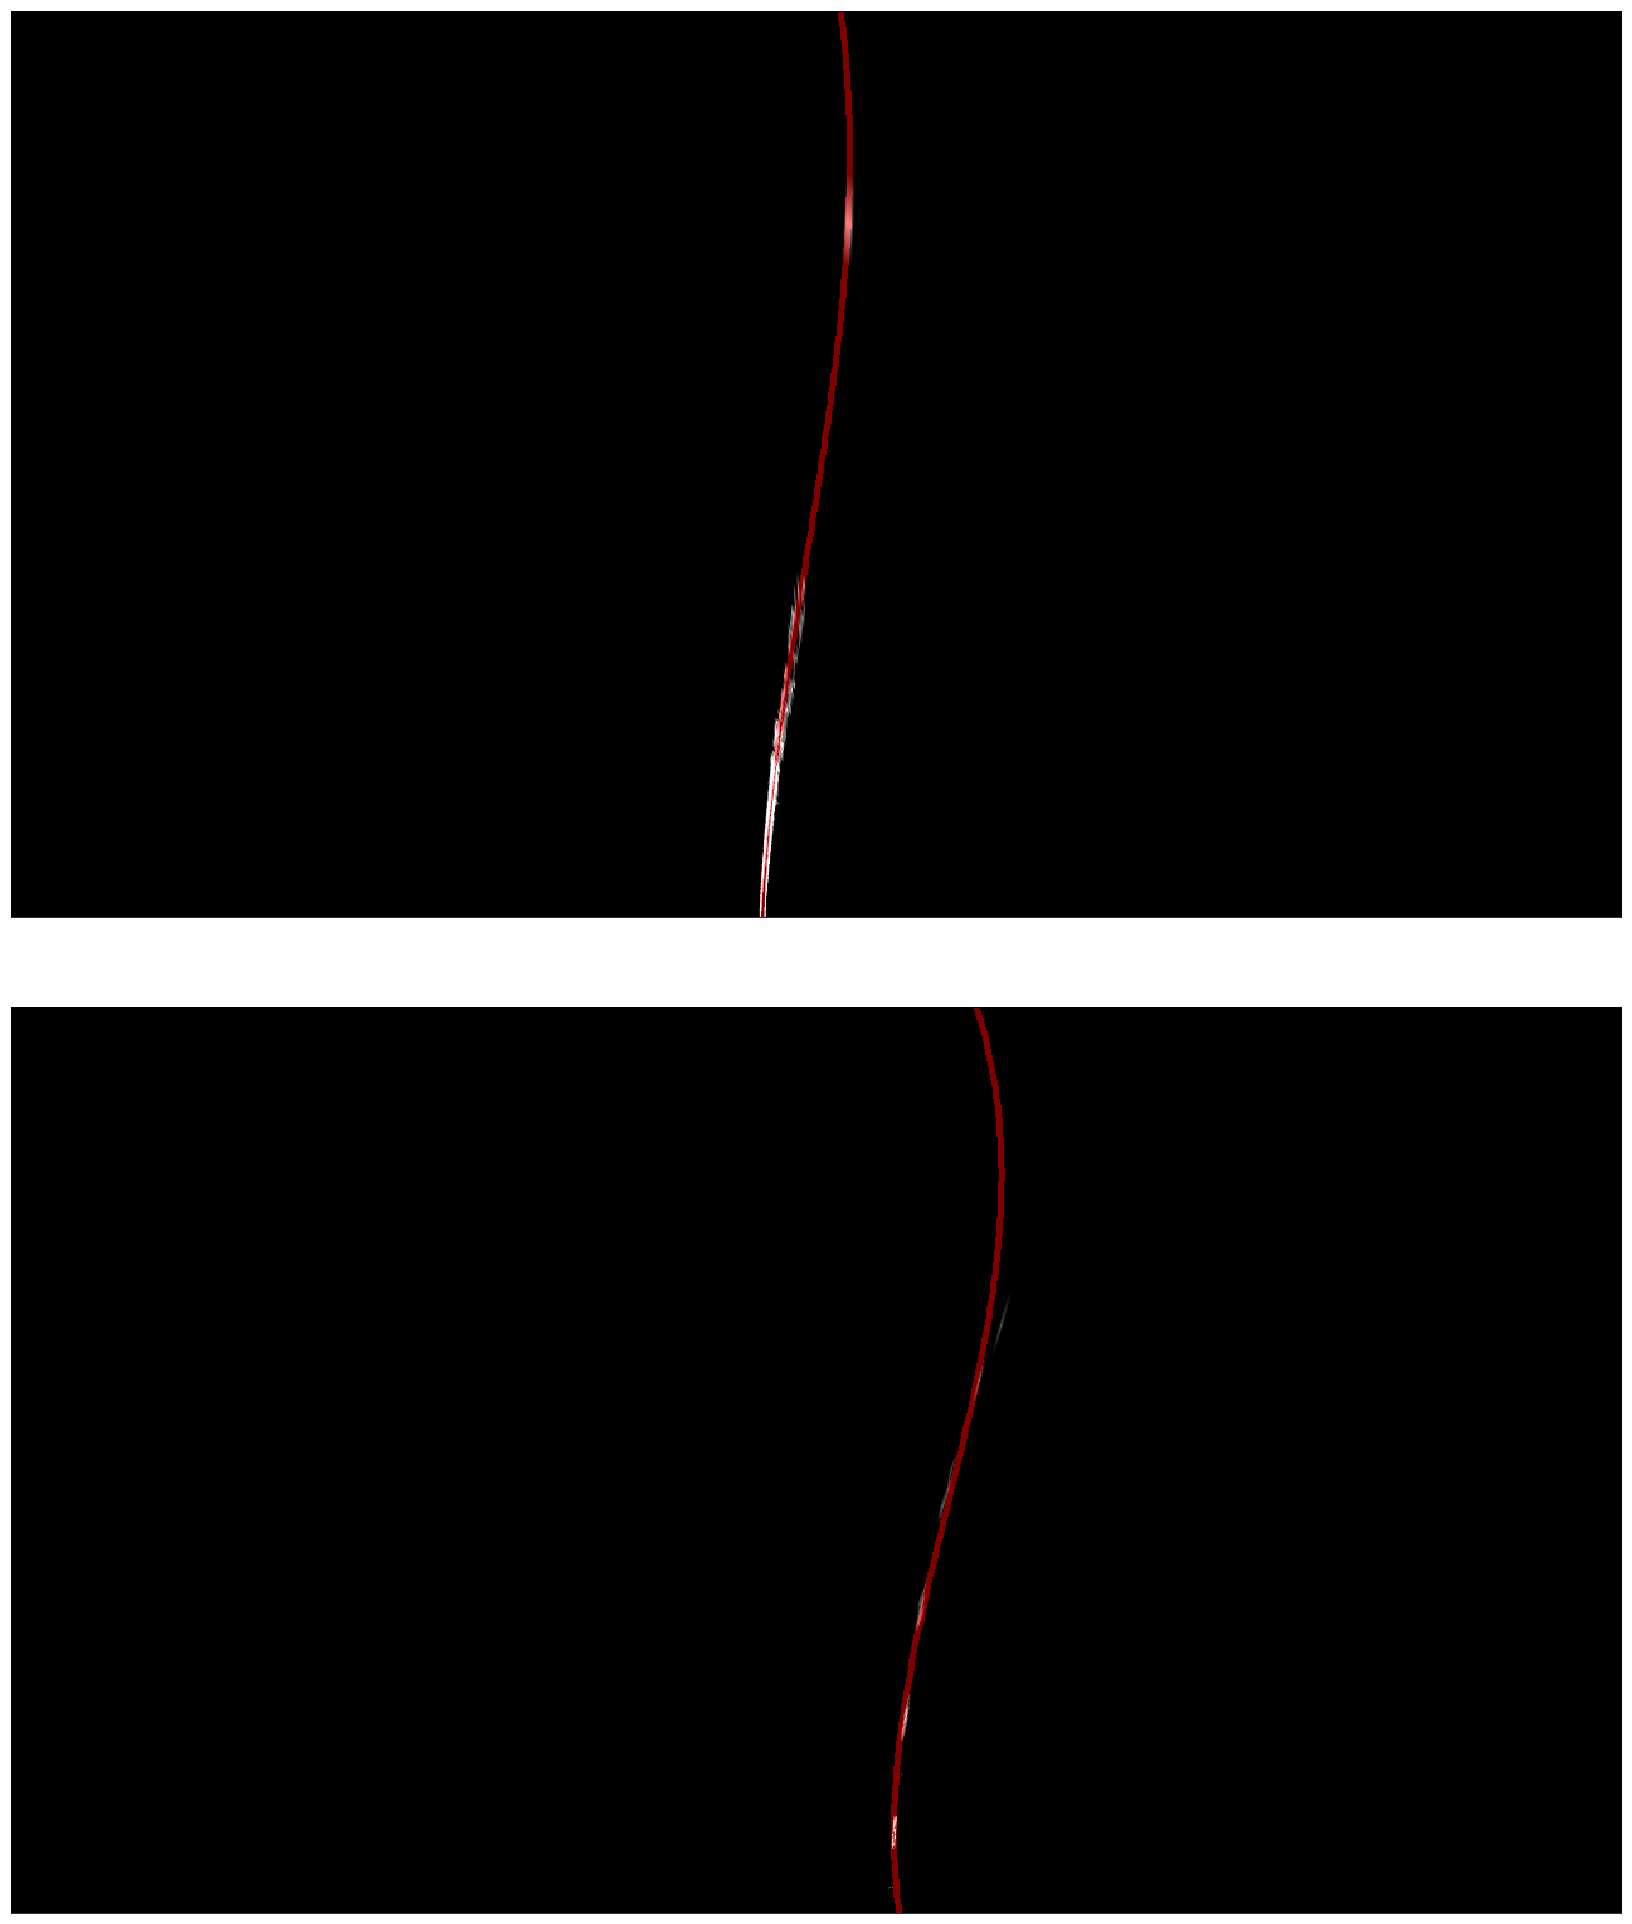

In [1132]:
array = [left_lane_line_img, right_lane_line_img]
showImages(array, 2, 1)


In [1133]:
left_projected_lane_line_img = camera.unproject(left_lane_line_img, laneWidth, (1280, 720), invert=True)
right_projected_lane_line_img = camera.unproject(right_lane_line_img, laneWidth, (1280, 720), invert=True)

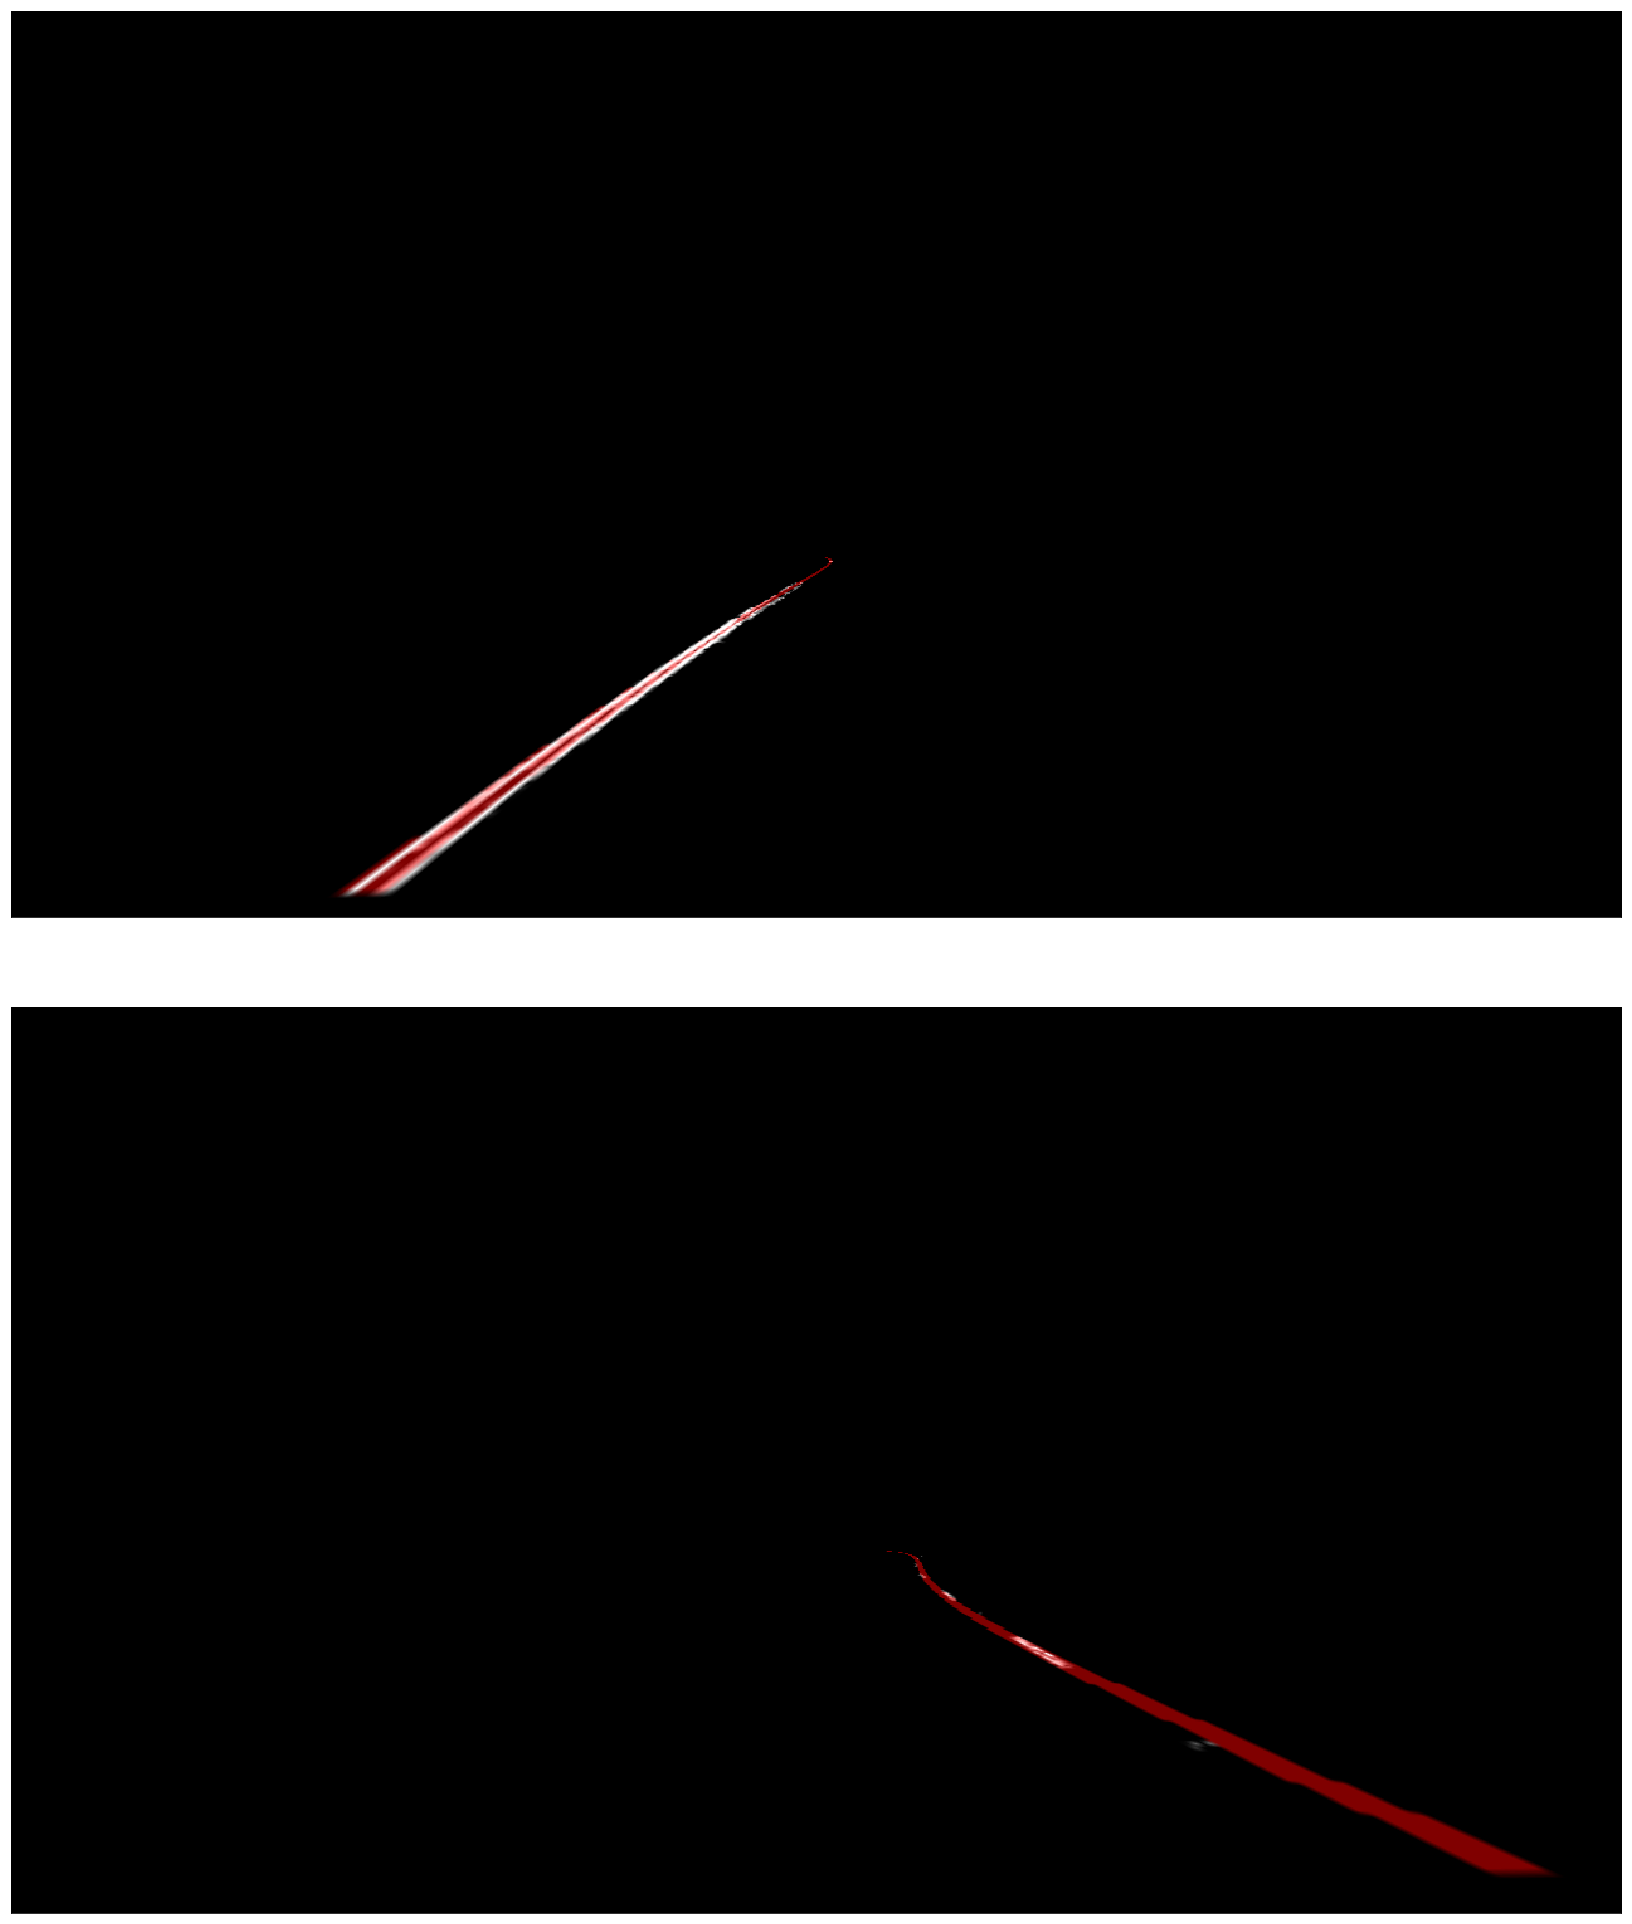

In [1134]:
array = [left_projected_lane_line_img, right_projected_lane_line_img]
showImages(array, 2, 1)


In [1135]:
combined_projected_lane_line_img = left_projected_lane_line_img + right_projected_lane_line_img
overlay_lane_line_img = cv2.addWeighted(un_test_images[imgindex], 1, combined_projected_lane_line_img, 0.5, 0.0) # overlay the orignal road image with window results

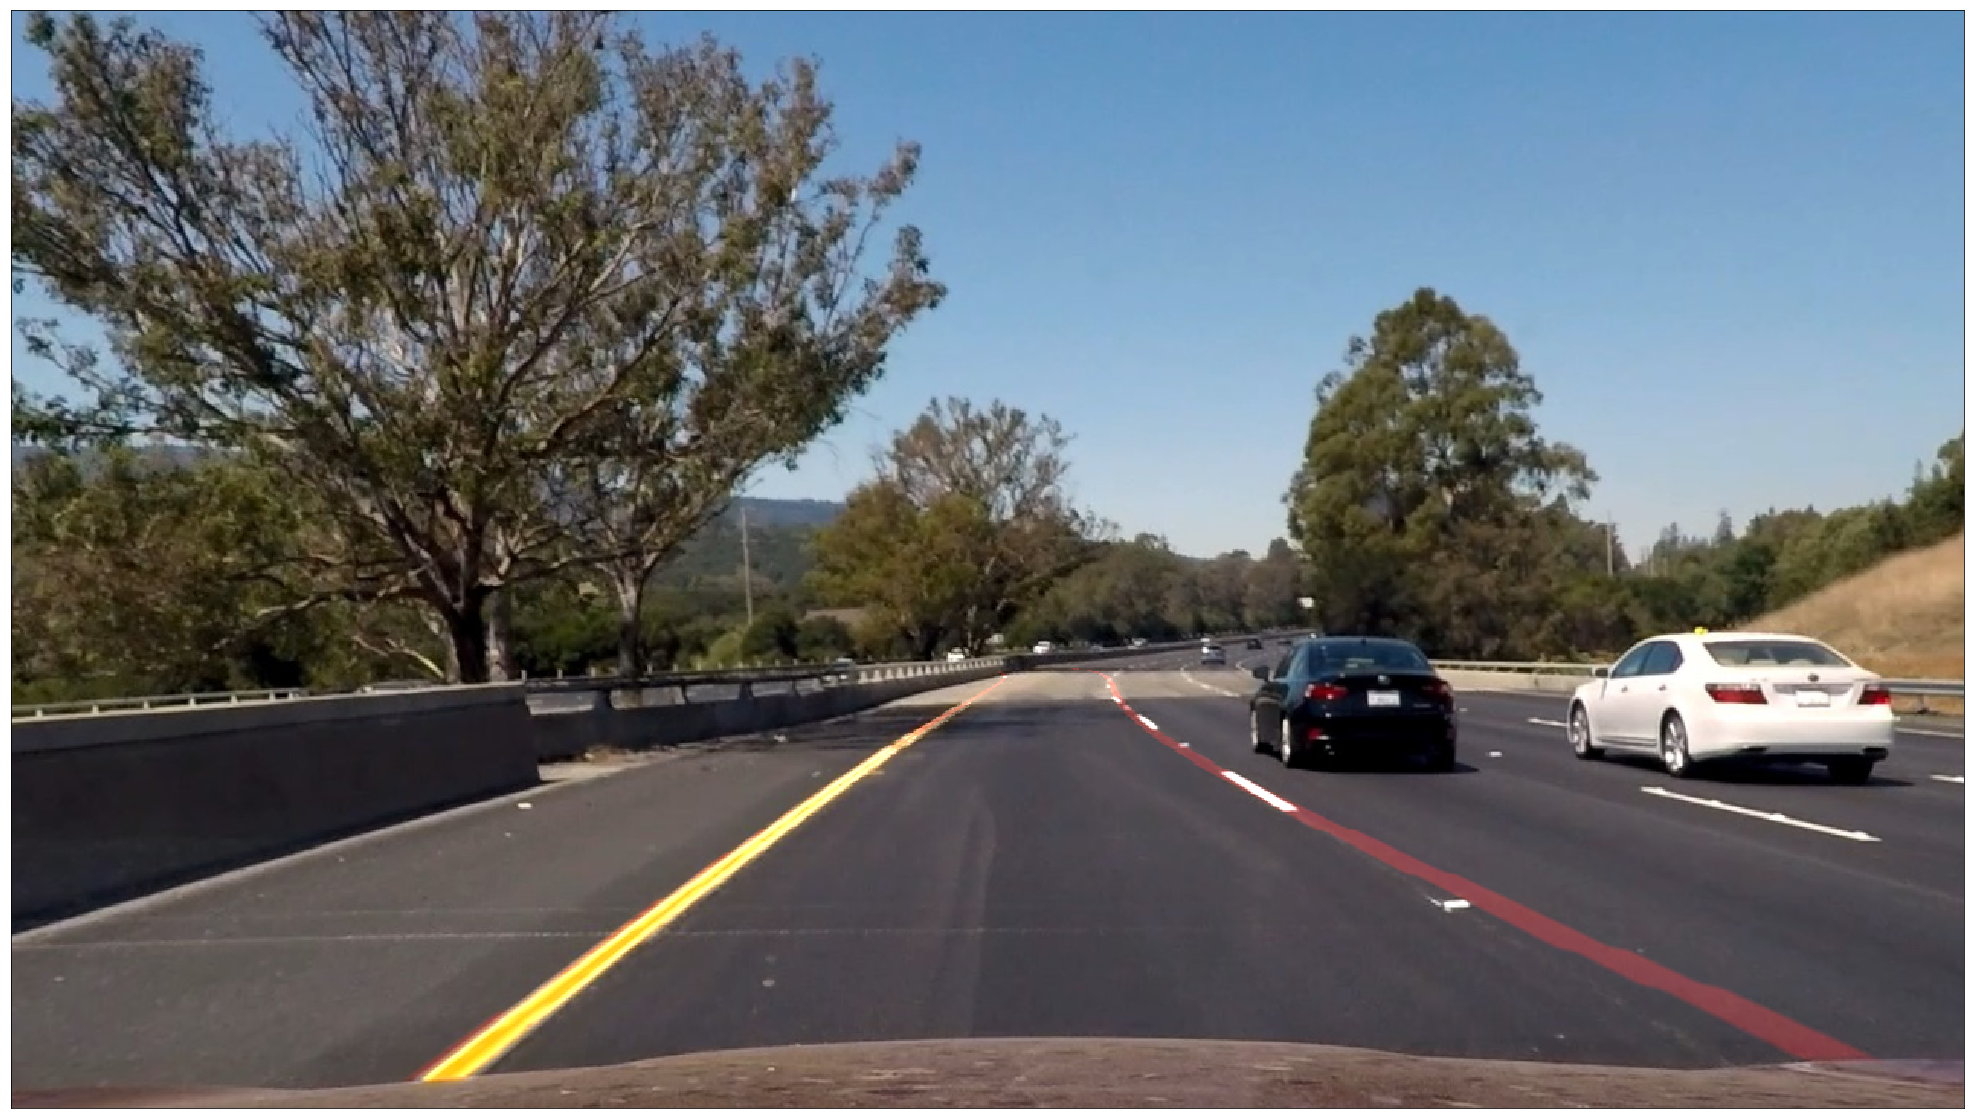

In [1136]:
array = [overlay_lane_line_img]
showImages(array, 1, 1)

In [1137]:
r = r_points[::-1]
center_points = np.concatenate((np.array(l_points), 
                               np.array(r)), axis=0
              )
center_lane_img = lanerender.renderLinePoints(center_points, 
  (left_lane_img.shape[0], left_lane_img.shape[1], 3), color=(0.,255.,0.), thickness=3, closed=True
)

center_projected_lane_line_img = camera.unproject(center_lane_img, laneWidth, (1280, 720), invert=True)

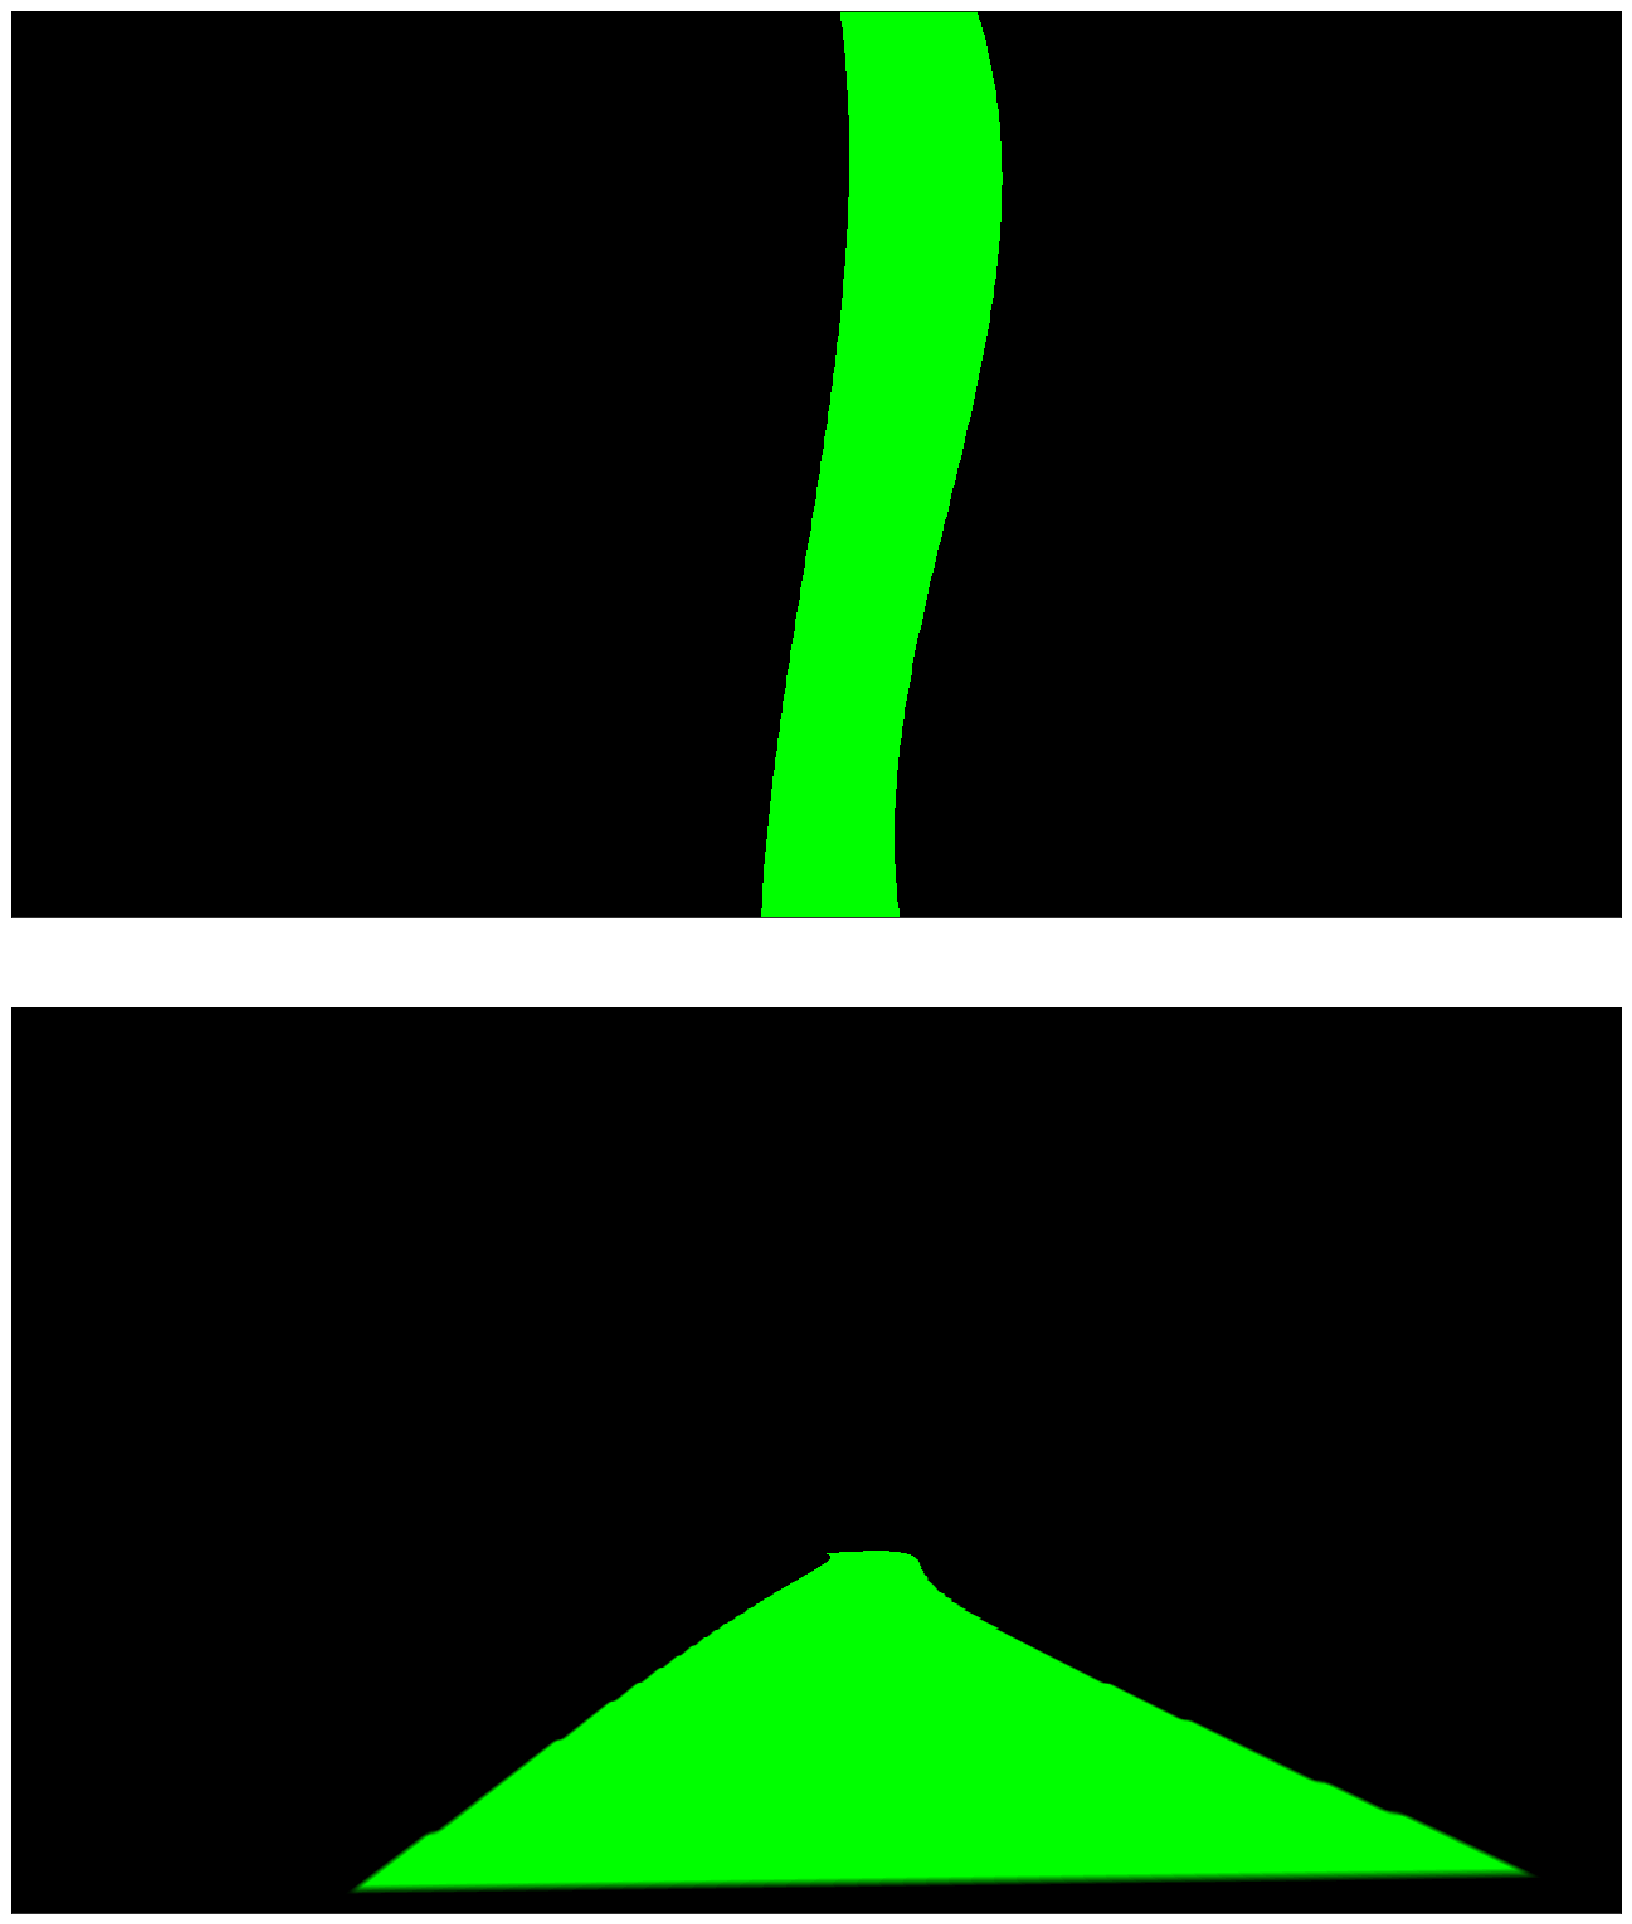

In [1138]:
array = [center_lane_img, center_projected_lane_line_img]
showImages(array, 2, 1)

In [1139]:
combined_projected_lane_img = center_projected_lane_line_img
overlay_lane_img = cv2.addWeighted(un_test_images[imgindex], 1, combined_projected_lane_img, 0.25, 0.0) # overlay the orignal road image with window results
combined_lane_line_img = left_line_img + right_line_img
projected_lane_line_img = camera.unproject(combined_lane_line_img, laneWidth, (1280, 720), invert=True)
overlay_lane_img = cv2.addWeighted(overlay_lane_img, 1, projected_lane_line_img, 1.0, 0.0)

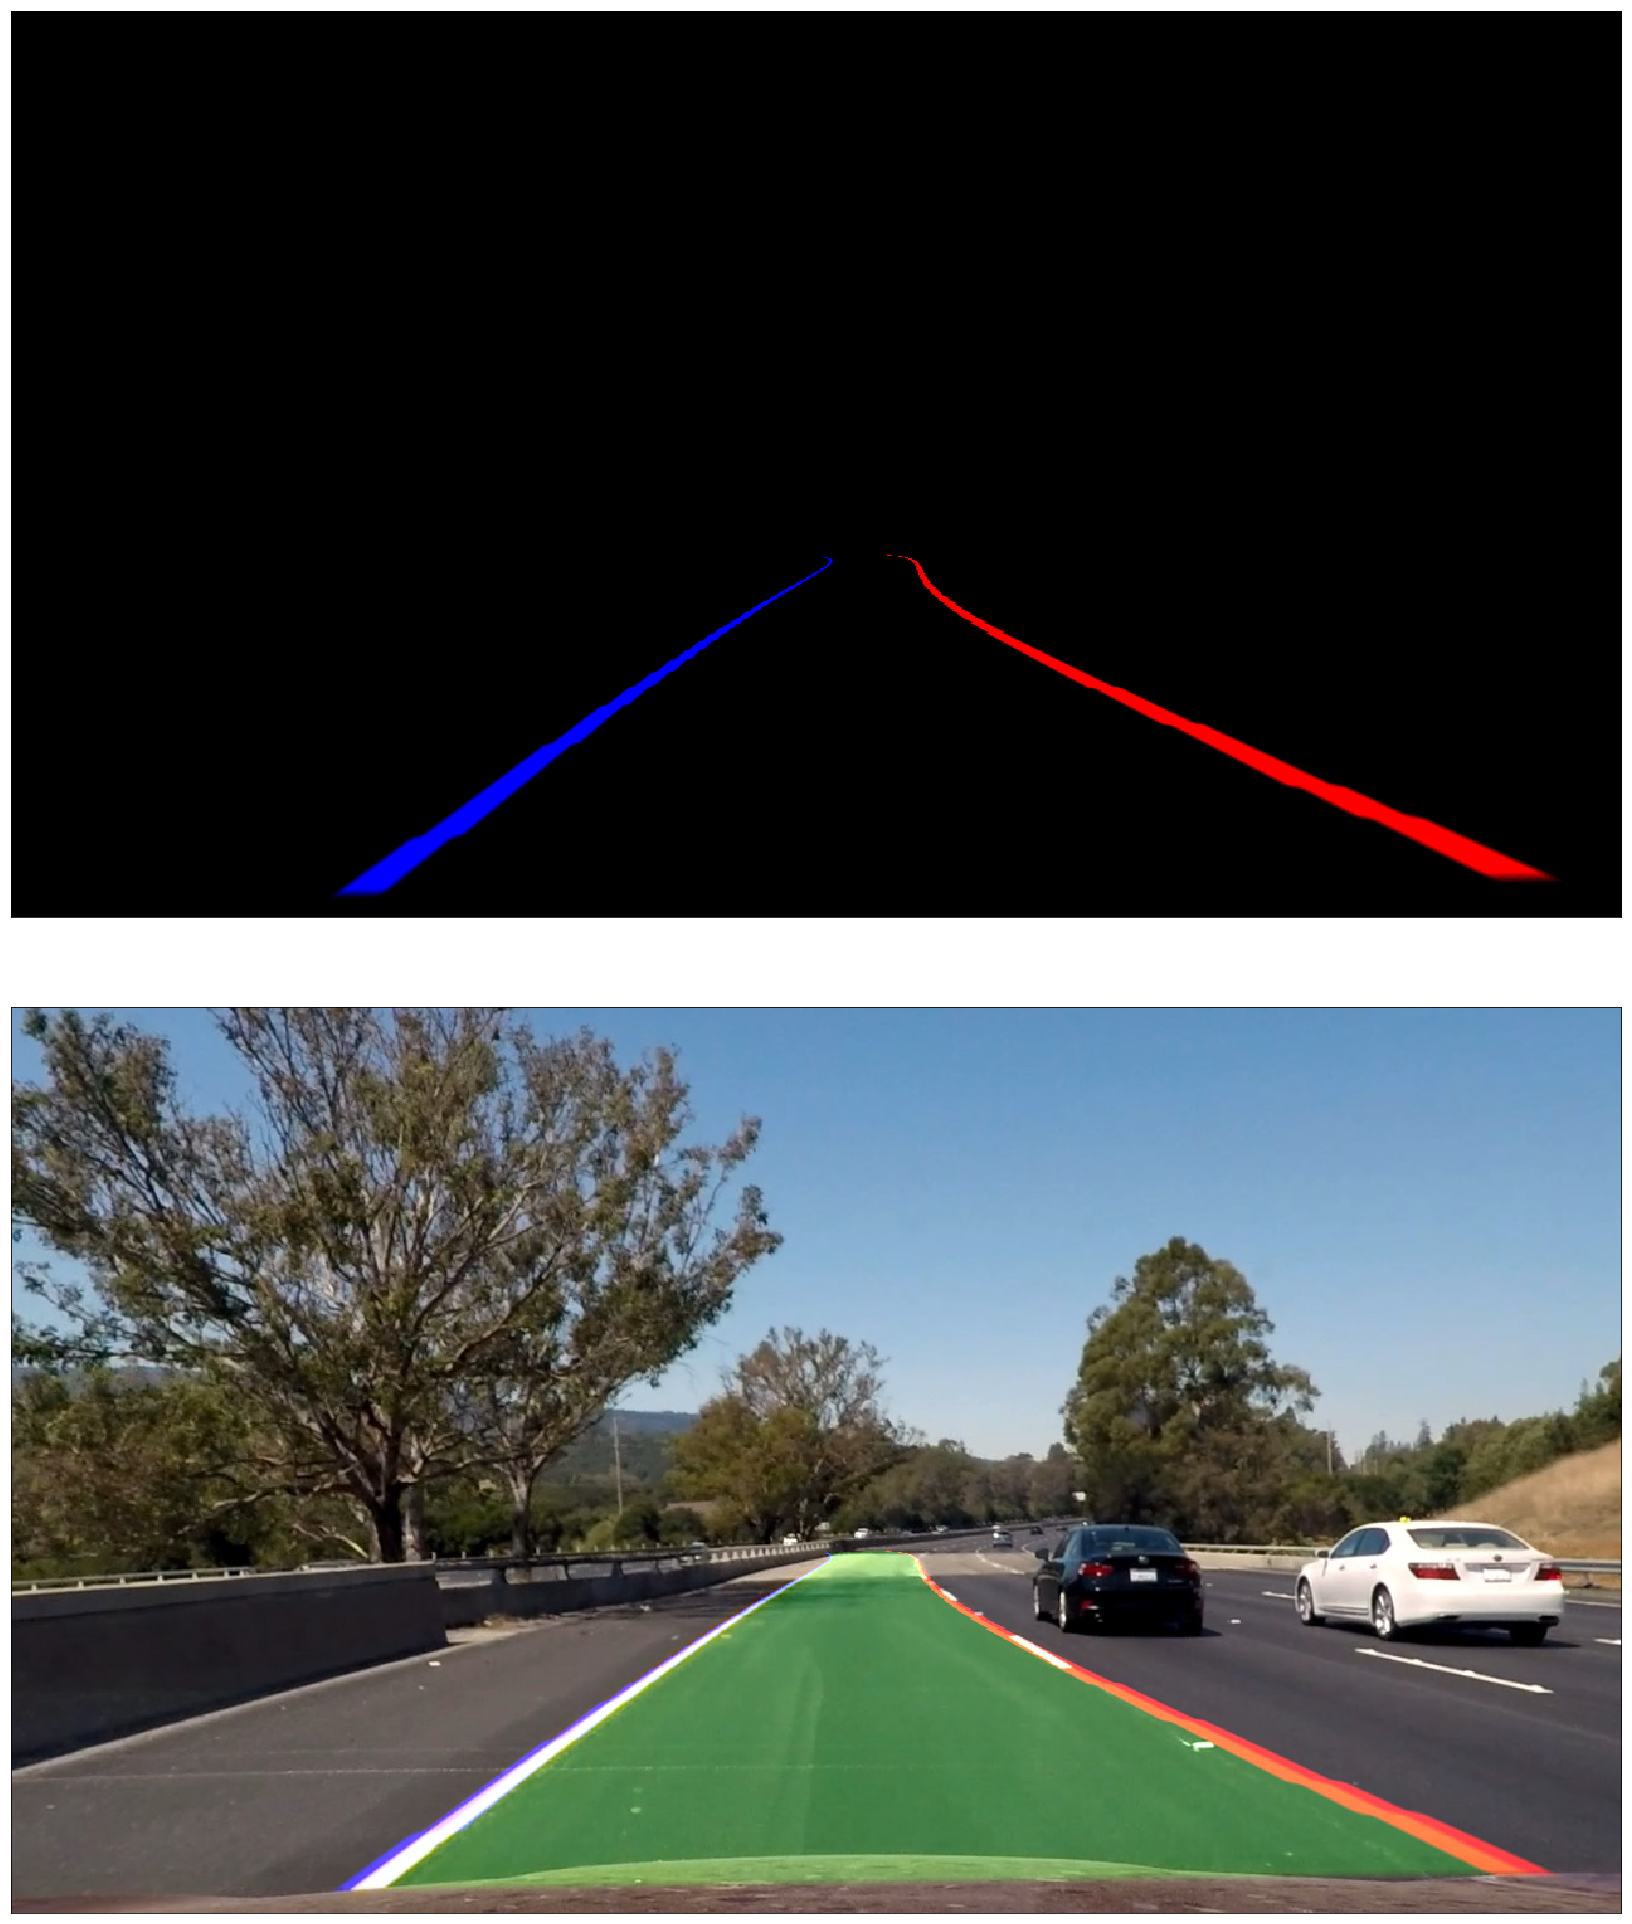

In [1140]:
array = [projected_lane_line_img, overlay_lane_img]
showImages(array, 2, 1)